<a href="https://colab.research.google.com/github/gibsonea/Biostats/blob/main/LabSolutions/Solutions13_Sampling_Dist_Prop_Full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <a name="11intro"> 3.3: Sampling Distributions for Proportions</a>

---


<figure>
<img
src="https://freesvg.org/img/Prismatic-Random-Numbers-Cloud.png"
alt="Bunch of random numbers" width = "25%"/>
<figcaption aria-hidden="true">
Credit: <a href="https://freesvg.org/bunch-of-random-numbers">Bunch of Random Numbers</a> in <a href="https://creativecommons.org/licenses/publicdomain/">Public Domain</a>
, via freesvg
</figcaption>
</figure>


We [previously used sampling distributions](https://githubtocolab.com/CU-Denver-MathStats-OER/Statistical-Theory/blob/main/Chap3/10-Sampling-Dist-Mean.ipynb) to describe the distribution of means computed from different random samples (each the same size) picked from the same population. The **standard error** (standard deviation of the sampling distribution) measures how much variability to expect due to the uncertainty in the sampling process. In many situations, a mean is not a relevant or helpful statistic, and other sample statistics, such as proportions, may be more applicable to the analysis. For example:

> If a jury pool of 20 people are randomly selected from a population where 42% of eligible jurors indentify their political party as Independent, what is *fair* representation for Independents on the jury pool?

Below are some observations to help guide our investigation in this section:

- The representation could be $8/20 = 0.40$, $9/20 = 0.45$, but not exactly 42%.
  - A goal of perfect representation in all possible ways is impossible to meet.
  - We should choose a more obtainable goal in this situation.
  - The goal can vary based on factors such as the interests and backgrounds of the researchers.
- The proportion of Independents varies from jury to jury.
  - We can consider a range of fair values.
  
- Political affiliation is measured as a categorical variable.
  - In the jury example, we consider two classes: "Independent" and "Not Independent".
  
There is no natural "mean" to consider in this context since the data is categorical. We can however count the number of Independents in a pool of 20 randomly selected jurors and consider what is fair proportional representation? Constructing a sampling distribution for the <font color="dodgerblue">**proportion**</font> of Independents on a randomly selected jury pool is more helpful than considering a distribution of sample means in this situation.


# <a name="11samp-prop">Sampling from a Binomial Distribution</a>

---

Fair representation on a jury is one example of a situation where analyzing a distribution of sample proportions may be appropriate. Very often we encounter statistical questions that ask us to approximate or compare proportions. For example

-   What proportion of voters support a certain candidate running for office?
-   What proportion of the population follow public health recommendations?
-   What proportion of items manufactured are defective?

We can use a sampling distribution of proportions to help analyze statistical questions regarding proportions. In these situations:

- We have a population in mind. *For example, all eligible jurors.*
- A sample size. *For example, $n=20$ people in a jury pool.*
- Count the number of "successes" in each sample. *How many independents, $X$, are in the pool?*
  - We can model the probability of $X$ "successes" with a <font color="dodgerblue">**binomial distribution**</font>.
- Calculate the corresponding <font color="dodgerblue">**sample proportion**</font> that we denote $\color{dodgerblue}{\widehat{p}}$.


$$\color{dodgerblue}{\boxed{
\widehat{p} = \frac{\mbox{Number of successes}}{\mbox{Size of sample}} = \frac{X}{n}
}}.$$

<br>

*Note: The $\widehat{p}$ symbol for a sample proportion is pronounced "p hat".*


## <a name="11q1">Question 1</a>

---

We randomly pick a pool of $20$ people to fill a jury pool from a population where 42% of eligible jurors identify their political party as Independents. A jury pool is picked that has 8 out of 20 people in the jury pool say they are politically Independent



### <a name="11q1a">Question 1a</a>

---

What is the value of $p$?

#### <a name="11sol11a">Solution to Question 1a</a>

---

$p = 0.42$

<br>



### <a name="11q1b">Question 1b</a>

---

What is the value of $\widehat{p}$?

#### <a name="11sol1b">Solution to Question 1b</a>

---

We have $\widehat{p} = \frac{8}{20} = 0.40$.

<br>



### <a name="11q1c">Question 1c</a>

---

Will the value of $\widehat{p}$ change when different jury pools are
selected? If not, explain why not. If so, what would you expect the value of $\widehat{p}$ to be? How much would you expect the value of $\widehat{p}$ to vary from sample to sample?

#### <a name="11sol1c">Solution to Question 1c</a>

---

Different jury pools will have different construction of people, and thus a different proportion $\widehat{p}$ that identify politically as Independents.

I would expect the sample to resemble the population, and thus have about 42% that are Independents, though with a jury of 20 people, we cannot have exactly 42% that are Independent. We can use a sampling distribution to measure how much variability to expect due to the randomness in jury selection.

<br>



### <a name="11q1d">Question 1d</a>

---

Will the value of $p$ change when different jury pools are selected? If not, explain why not. If so, what would you expect the value of $p$ to be? How much would you expect the value of $p$ to vary from sample to sample?

#### <a name="11sol1d">Solution to Question 1d</a>

---

The value of $p$ is the same for all jury pools since they are all being picked from the same population.

<br>



### <a name="11q1e">Question 1e</a>

---

Let random variable $X$ denote the number of people in the jury pool that identify politically as Independent. What random variable can we use to model the probabilities of picking different values of $X$?

#### <a name="11sol1e">Solution to Question 1e

---

- Each person selected is either an Independent or not. For each person, there are two possible outcomes.
- We have a set number of people we are selecting, $n=20$.
- Each person selected has probability $p=0.42$ of being an Independent.
- Each person selected is independent of the others that have been selected.

Thus, we use a binomial distribution:

$$X \sim \mbox{Binom}(20, 0.42).$$
  
<br>



# <a name="11sim">Simulating a Sampling Distribution of Proportions</a>

---

Before investigating the theory, we will first walk through a statistical simulation for constructing a sampling distribution for proportions. Hopefully we can see similarities in this process as with our initial construction of [sampling distributions for
means](https://githubtocolab.com/CU-Denver-MathStats-OER/Statistical-Theory/blob/main/Chap3/10-Sampling-Dist-Mean.ipynb), and these connections will be useful in constructing sampling distributions with statistics. We will compare the results of the simulation with the theory we explore after.



## <a name="11sample">Simulating Jury Selection with `sample()`</a>

---

We first pick one random sample size $n=20$ from the population
$X \sim \mbox{Binom}(20, 0.42)$. The code cell below uses the
`sample()` function to simulate randomly selecting a pool of 20 jurors
from a population where 42% of voters identify as Independents and the
remaining 58% of voters do not identify as Independent.

-   Note 5 out of the 20 people stored in `jury.pool` identify their political party as Independent.
-  <font color="mediumseagreen">*Tip: The command `set.seed(937)` fixes the randomization used each time the `sample()` command is run so the same output is generated every time.*</font>
  - <font color="mediumseagreen">*Feel free to delete the `set.seed()` command to appreciate the variability in random sampling.*</font>

In [9]:
# set seed for randomization so results do not change
set.seed(937)

jury.pool <- sample(c("Indep", "Not"),  # each time we select either Indep or Not
                    size = 20,  #  pick 20 people for the pool
                    replace = TRUE,  # replace the value each time before resampling
                    prob = c(0.42,0.58))  # probabilities of success ("Indep") and failure ("Not")
jury.pool  # print results to screen

[1] "Not"   "Indep" "Indep" "Not"   "Not"   "Indep" "Not"   "Not"   "Not"  
[10] "Not"   "Not"   "Not"   "Indep" "Not"   "Not"   "Not"   "Not"   "Not"  
[19] "Indep" "Not"

## <a name="11phat">Compute Sample Proportion, $\widehat{P} = \dfrac{X}{n}$</a>

---

The command `sum(jury.pool == "Indep")` counts how many values in the vector `jury.pool` are equal to the string “Indep”.

-   Based on the output stored in `jury.pool` from the previous code cell, the output $5$ is stored in `x`.
-   Thus, the sample proportion stored in `p.hat` is $\widehat{p} = \frac{5}{20} = 0.25$.

In [10]:
# out of the 20 values in jury.pool
# count how many equal the string "Indep"
x <- sum(jury.pool == "Indep")

n <- 20  # jury pool is size n=20
p.hat <- x / n  # compute p-hat
p.hat

[1] 0.25

<font color="mediumseagreen">*Tip: The command `mean(jury.pool == "Indep")` is a more concise way to calculate a sample proportion. The `mean()` function will both sum the number of "Indep" in `jury.pool` and divide by the length of the vector `jury.pool`, resulting in a sample proportion.*</font>

In [11]:
# sample proportion with `mean()`
mean(jury.pool == "Indep")

[1] 0.25

## <a name="11dist-samp">Constructing a Distribution of Sample Proportions</a>

---

To construct a sampling distribution of proportions, we repeat the two steps above over and over again.

1.  Pick a random sample of $n=20$ using the `sample()` function.
2.  Calculate $\widehat{p}$ using a logical test and either a `sum()` or `mean()` function.

The for loop in the code cell below repeats the two previous steps
10,000 times and stores each sample proportion in a vector named
`samp.prop`. Run the code cell below to generate a possible sampling
distribution for proportions.

- There is nothing to edit in the code cell.
- Do not worry, no output is printed to the screen since the output is being stored in `samp.prop`.

In [12]:
samp.prop <- numeric(10000) # creates an empty vector to store results
n <- 20  # each random jury pool is size n=20

# a for loop that generates 10,000 random samples
for (i in 1:10000)
{
  temp.pool <- sample(c("Indep", "Not"),  # pick jury pool
                      size = 20,
                      replace = TRUE,
                      prob = c(0.42,0.58))
  samp.prop[i] <-sum(temp.pool == "Indep")/n  # calculate sample proportion
}

The previous code cell generated many (10,000) random samples. We did not ensure that *all* possible samples are selected exactly once. Generating all possible random samples requires more intricate code that is time consuming to run.

- For example, if the population of eligible voters is only 100 people, then there would be $\begin{pmatrix} 100 \\ 10 \end{pmatrix} = 5.4 \times 10^{20}$ distinct jury pools that could be selected!

By relaxing the condition to generate every possible sample exactly once, we can get a very good approximation of the sampling distribution with much simpler code that is easier to read, modify, and run!

The code cell below plots a histogram of the sampling distribution of the sample proportion of Independents on a jury pool size $n=20$.
- Comments are used to help explain `hist` options
- There is nothing to edit in the code cell.

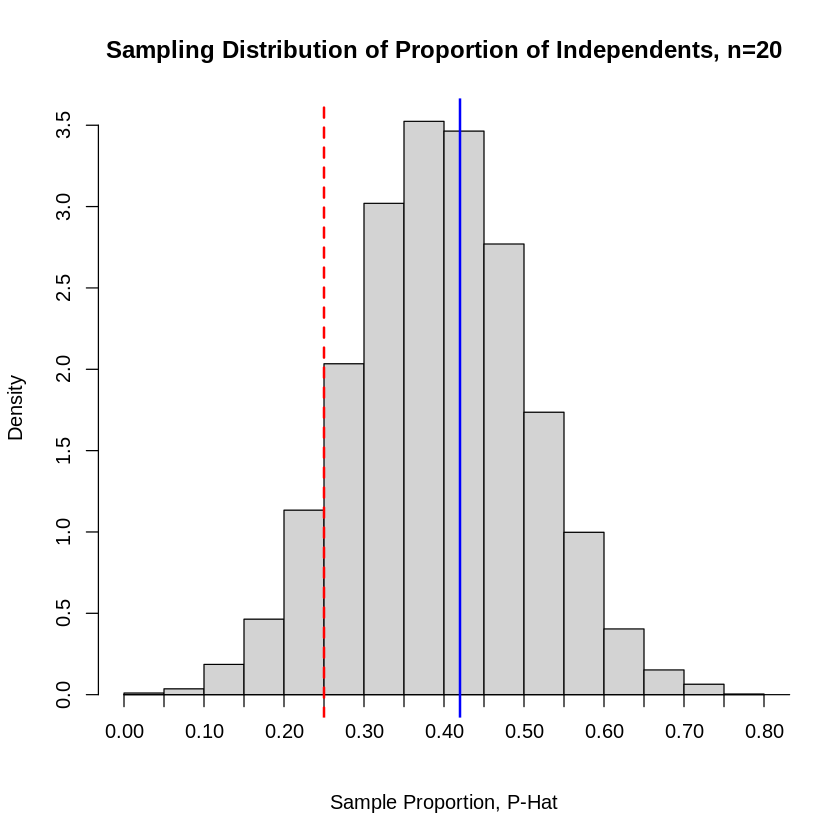

In [13]:
hist(samp.prop,  # plot stored sample proportions
     breaks = 20,  # use 20 breaks
     xlab = "Sample Proportion, P-Hat",  # x-axis label
     main = "Sampling Distribution of Proportion of Independents, n=20",  # main label
     freq = FALSE,  # plot relative frequencies (density) on y-axis
     xaxt='n')  # disable default x-axis

axis(1, at=seq(0, 1, 0.05), pos=0)  # customize ticks on x-axis

abline(v = 0.42, col = "blue", lwd = 2, lty = 1)  # draws vertical line at p
abline(v = 5/20, col = "red", lwd = 2, lty = 2)  # draws vertical line at p-hat

## <a name="11q2">Question 2</a>

---

Based on the sampling distribution for the sample proportion of
Independents plotted above, answer the following:

-   What is significant about the location of the blue vertical line plotted at $p=0.42$ relative to the other sample proportions?
-   What is significant about the location of red vertical line plotted at $\widehat{p}=\frac{5}{20} = 0.25$ relative to the other sample proportions?
-   What is a “fair” amount of representation for Independents on a jury pool of size $n=20$?
-   Based on the values stored in `samp.prop`, what is the probability of randomly selecting a jury pool of $n=20$ that has a sample proportion of Independents that is at most $\widehat{p} = 0.25$?
  - *Hint: Use a logical test involving `samp.prop` and a `sum()` or `mean()` command.*

### <a name="11sol2">Solution to Question 2</a>

---

<br>  

- The blue vertical line is in the center of the sampling distribution which indicates the mean of the sampling distribution is the population proportion $p=0.42$.

- The sample proportion $\widehat{p}=0.25$ is fairly far away from the center of the distribution indicating such a jury is somewhat unlikely though not an extreme outlier.

- Answers will vary.

- $P( \widehat{P} \leq 0.25 ) = 0.0915$. There is a 9.15% chance of picking a random pool of jurors that consists of at most 25% Independents.

<br>

In [14]:
# use samp.prop to approximate P( p-hat <= 0.25)
mean(samp.prop <= 0.25)

[1] 0.0915

# <a name="11theory">A Theoretical Approach</a>

---

When constructing a sampling distribution for proportions, we noted that the probability of getting a certain number of “successes”, $X$, in a sample size $n$ can be modeled using a binomial distribution. We can make use of properties of binomial distributions to obtain a theoretical model for the sampling distribution of sample proportions. The theory gives another method for describing sampling distributions using formulas as opposed to statistical simulations that require technology.



## <a name="11q3">Question 3</a>

---

Let $X \sim \mbox{Binom}(n,p)$, and consider the distribution of sample proportions $\widehat{P} = \frac{X}{n}$.



### <a name="11q3a">Question 3a</a>

---

Using [properties of the binomial
distribution](https://githubtocolab.com/CU-Denver-MathStats-OER/Statistical-Theory/blob/main/Chap2/07-Common-Discrete-RandVar.ipynb), what are $E(X)$ and $\mbox{Var}(X)$? Your answers will depend on the parameters $n$ and $p$.

#### <a name="11sol3a">Solution to Question 3a</a>

---

We have $E(X) = np$ and $\mbox{Var}(X) = npq$.

<br>  
<br>  
<br>



### <a name="11q3b">Question 3b</a>

---

Let $\widehat{P} = \frac{X}{n}$ denote the distribution of sample proportions. Using formulas from [Question 3a](#11q3b) and [properties of expected value and variance](https://githubtocolab.com/CU-Denver-MathStats-OER/Statistical-Theory/blob/main/Chap2/06-Expected-Value-and-Variance.ipynb#06prop-ex), give
formulas for $E( \widehat{P} )$ and $\mbox{Var}( \widehat{P} )$. Your formulas should depend on the parameters $n$ and $p$.

#### <a name="11sol3b">Solution to Question 3b</a>

---

<br>  

We have $\mu_{\widehat{P}} = E \left( \frac{X}{n} \right) = \frac{1}{n}E(X)= \frac{1}{n}(np)=p$.

For the variance, we have:

$$\begin{aligned}
\mbox{Var}(\widehat{P}) &= \mbox{Var} \left( \frac{X}{n} \right) \\
&= \frac{1}{n^2}  \mbox{Var} (X)\\
&= \frac{1}{n^2} (npq)\\
&= \frac{p(1-p)}{n}
\end{aligned}$$

And therefore the standard error is

$$\sigma_{\widehat{P}} = \mbox{SE}\left( \widehat{P} \right) = \sqrt{\frac{p(1-p)}{n}}$$

<br>



# <a name="11clt">Central Limit Theorem for Proportions</a>

---

Let $X \sim \mbox{Binom}(n,p)$ be a binomial random variable, and let
$\widehat{P} = \frac{X}{n}$ denote the distribution of sample
proportions. Then if the sample size $n$ satisfies <font color="dodgerblue">**both** $\mathbf{np \geq 10}$ and
$\mathbf{n(1-p) \geq 10}$</font> , the sampling distribution for
$\widehat{P}$ will:

-   Be approximately <font color="dodgerblue">**normally
    distributed**</font>.
-   Have mean $\color{dodgerblue}{E(\widehat{P}) = \mu_{\widehat{P}} =p}$.
-   Have <font color="dodgerblue">**standard error**</font> $\color{dodgerblue}{\mbox{SE}(\widehat{P}) = \sigma_{\widehat{P}} = \sqrt{\frac{p(1-p)}{n}}}$.
  -   The standard error measures the variability in sample proportions
    due to the randomness in sampling.

We summarize the results of the <font color="dodgerblue">**Central
Limit Theorem (CLT) for Proportions**</font> more concisely below:

$$\color{dodgerblue}{\boxed{ \widehat{P} \sim N \left( \mu_{\widehat{P}} , \sigma_{\widehat{P}} \right) = N \left( p  , \sqrt{\frac{p(1-p)}{n}} \right) \qquad \mbox{ as long as both } np \geq 10 \mbox{ and } n(1-p) \geq 10.}}$$

<br>

*Note: Random variable $X$ is a discrete random variable. Using the expressions for $E(X)$ and $\mbox{Var}(X)$ in [Question 3a](#11q3a), we can approximate discrete $X \sim \mbox{Binom}(n, p)$ with continuous $N(np, \sqrt{np(1-p)})$. The CLT for proportions essentially is stating this in terms of sample proportions $\widehat{P}$ instead of the counts $X$.*


## <a name="11q4">Question 4</a>

---

Use the CLT for proportions to describe the sampling distribution for the proportion of Independents on a jury pool of $n=20$ people. As with earlier, assume 42% of the population of eligible jurors identify their political party as Independent.

### <a name="11sol4">Solution to Question 4</a>

---

<br>

We have $\widehat{P} \sim N \left( 0.42, \sqrt{\frac{0.42(0.58)}{20}} \right) = N(0.42, 0.1103).$

<br>



## <a name="11q5">Question 5</a>

---

Based on your answer in [Question 4](#11q4), what is the probability of randomly picking a pool of 20 jurors that consists of at most 25% that identify politically as Independent.

*Hint: Use the `pnorm()` function to help!*

### <a name="11sol5">Solution to Question 5</a>

---

From the output below, we have

$$P( \hat{P} \leq 0.25 ) = 0.0617.$$

In [15]:
# use CLT and pnorm()
se.ind <- sqrt((0.42)*(1-0.42) / 20)
se.ind
pnorm(.25, 0.42, se.ind)

[1] 0.110363

[1] 0.061735

In [16]:
z <- (0.25 - 0.42) / se.ind
z

[1] -1.540371

In [17]:
pnorm(z)
pnorm(z, 0, 1)

[1] 0.061735

[1] 0.061735

## <a name="11q6">Question 6</a>

---

In [Question 2](#11q2) and [Question 5](#11q5) we use two different methods to
calculate $P( \widehat{P} \leq 0.25)$, the probability of picking a jury
pool of 20 people that has at most 25% that identify politically as
Independent:

-   [Question 2](#11q2) uses a simulation to approximate the sampling distribution for the proportion of Independent.
-   [Question 5](#11q5) uses the CLT to theoretically model the sampling distribution.

Compare each of the values you obtained for $P( \widehat{P} \leq 0.25)$ in [Question 2](#11q2) and [Question 5](#11q5). Which do you believe is more accurate and why?

### <a name="11sol6">Solution to Question 6</a>

---

Both the simulation and give an approximations for the sampling distribution of proportions. We cannot be sure which is more accurate without comparing with the actual value of this proportion.

Let $X$ denote the number of Independents in the sample of 20 jurors. Note that when $\widehat{p} = \frac{X}{20} = 0.25$ we have $X=5$. If we use $X \sim \mbox{Binom}(20, 0.42)$ to calculate $P(X \leq 5)$, we see from the code cell below that $P(X \leq 5) =0.0922$ which is closer the answer we obtained using the simulation compared to CLT.

<br>



In [18]:
pbinom(5, 20, 0.42)

[1] 0.09218964

# <a name="11size">How Large Does $n$ Need to Be?</a>

---

In the jury pool example, we have $n=20$, $p=0.42$, and thus $np = 8.4 < 10$. Our sample is *not* seemingly large enough for the CLT according to the conditions stated for proportions above. However, the $np \geq 10$ and $n(1-p) \leq 10$ conditions are more like *general guidelines*. We can check how consistent the results of the sampling distribution simulation (results of for loop stored in `samp.prop`) are with the CLT:

- The code cell below checks how closely our simulation matches the result $\mu_{\widehat{P}} = E(\widehat{P}) = p=0.42$.



In [19]:
mean(samp.prop)

[1] 0.42013


- The code cell below checks how closely our simulation matches the result $\sigma_{\widehat{P}} = \mbox{SE}(\widehat{P}) = \sqrt{\frac{p(1-p)}{n}}=0.1104$.




In [20]:
sd(samp.prop)

[1] 0.1101817

- The code cell below uses a **quantile-quantile plot** to compare the distribution of sample proportions from our simulation to the standard normal distribution.
  
  - <font color="mediumseagreen">**The sampling distribution distribution is fairly close to the line in the qq-plot!**</font>





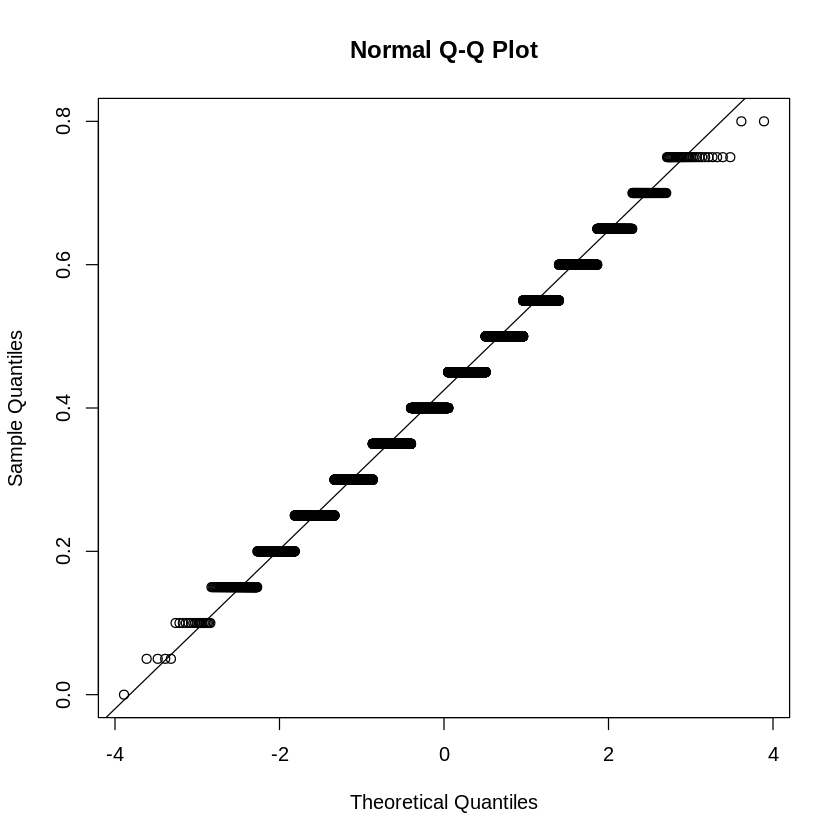

In [21]:
qqnorm(samp.prop)
qqline(samp.prop)

- We see <font color="mediumseagreen">**all three results regarding the center, spread, and shape of the sampling distribution of sample proportions are reasonably accurate**</font> in the jury pool example even though the conditions of the "rule" are not quite satisfied.


In the statement of the Central Limit Theorem for proportions, we state the theorem applies as long as <font color="dodgerblue">**both $np \geq 10$ and $n(1-p) \geq 10$**</font>.


In [22]:
samp.prop.n12 <- numeric(10000) # creates an empty vector to store results
samp.prop.n100 <- numeric(10000) # creates an empty vector to store results


# a for loop that generates 10,000 random samples
for (i in 1:10000)
{
  temp.pool <- sample(c("Indep", "Not"),  size = 12,  replace = TRUE, prob = c(0.10,0.90))  # pick jury pool
  samp.prop.n12[i] <-sum(temp.pool == "Indep")/12  # calculate sample proportion
}

# a for loop that generates 10,000 random samples
for (i in 1:10000)
{
  temp.pool <- sample(c("Indep", "Not"),  size = 100,  replace = TRUE, prob = c(0.50,0.50))  # pick jury pool
  samp.prop.n100[i] <-sum(temp.pool == "Indep")/100  # calculate sample proportion
}

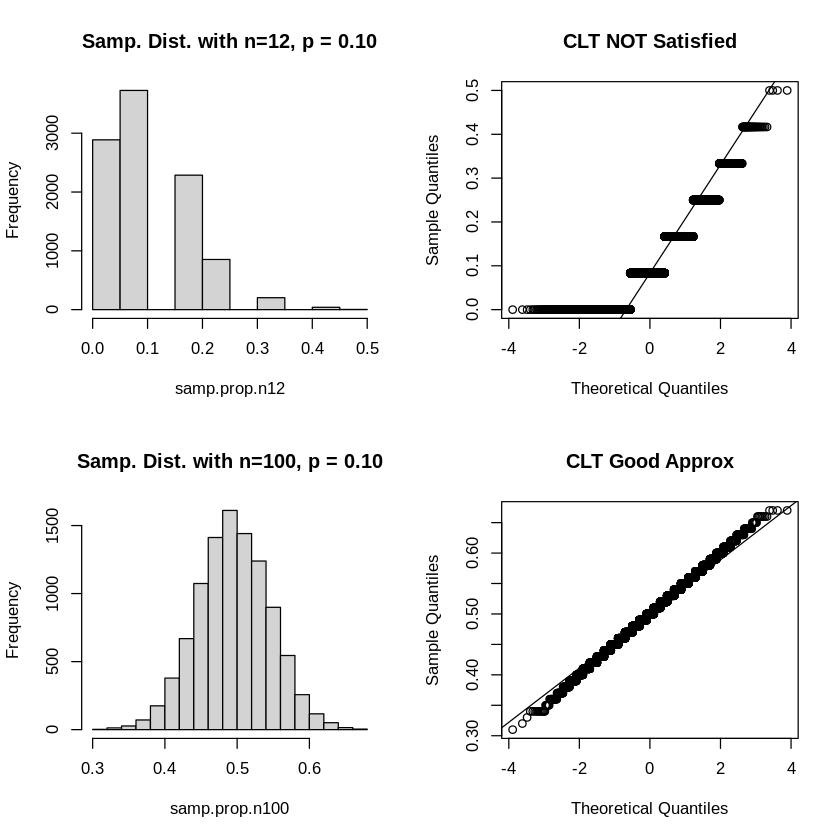

In [23]:
par(mfrow=c(2,2))

hist(samp.prop.n12, main = "Samp. Dist. with n=12, p = 0.10")

qqnorm(samp.prop.n12, main = "CLT NOT Satisfied")
qqline(samp.prop.n12)

hist(samp.prop.n100, main = "Samp. Dist. with n=100, p = 0.10")

qqnorm(samp.prop.n100, main = "CLT Good Approx")
qqline(samp.prop.n100)

- The $np \geq 10$ and $n(1-p) \geq 10$ criterion is <font color="tomato">not a set rule</font> that *must* be satisfied.
  - If the conditions are met, then a normal distribution is a good approximation.
  - If the conditions are not met, then a normal distribution *may* still be a good approximation. Compare distributions!
  
- <font color="dodgerblue">**Whether a normal distribution is a good approximation depends on both the sample size $n$ and the proportion $p$.**</font>
  - The larger $n$ is, the better the more normal ($p$ closer to 1 or 0 can be okay).
  - The closer $p$ is to $0.5$, the more normal (smaller $n$ can be okay).
  
- <font color="dodgerblue">**It is always a good to compare/check numerical and theoretical results to be sure!**</font>

If our sample is not large enough (either $np < 10$ or $n(1-p) < 10$) then sampling distribution of the sample proportions:

- <font color="mediumseagreen">**Will still satisfy $E(\widehat{P}) = p$.**</font>
- <font color="mediumseagreen">**Will still have standard error $\mbox{SE}( \widehat{P}) = \sqrt{\frac{p(1-p)}{n}}$.**</font>
- <font color="tomato">**But may NOT be normally distributed.**</font>


# <a name="11binom-normal">Comparing Binomial and Normal Distributions</a>

---

When constructing a sampling distribution of sample proportions, we approximate the distribution of sample proportions with a continuous distribution, namely a normal distribution. However, the possible sample proportions we can get from a sample size $n$ are not continuous. The possible sample proportions are a discrete set.

-   In the jury example, we have $n=20$ and $X = \left\{ 0, 1, \ldots , 19, 20 \right\}$.
-   Thus, the possible sample proportions are $\widehat{p} = \left\{ 0, 0.05, 0.10, \ldots , 0.95, 1 \right\}$.
-   However, in [Question 5](#11q5) we approximate $\widehat{P} \sim N( 0.42, 0.1104)$ with a continuous, normal distribution.
- *Note: We could equivalently use $N \big( 8.4, \sqrt{(20)(0.42)(0.58) \big)}$ to approximate $X \sim \mbox{Binom} (20, 0.42)$ and have the same issue.*
-   We can see this discrepancy between discrete data and continuous approximation in the step-like pattern in the previous qq-plots.

Since CLT for Proportions uses a continuous (normal) distribution to approximate a discrete (binomial) distribution, any results obtained using CLT will be approximations, not exact.



## <a name="11q7">Question 7</a>

---

Consider the same jury pool example where we randomly select a jury from
a population where 42% of eligible jurors identify their political party
as Independent. Let $X$ denote the number of Independents on jury pool
size $n=20$. Use a binomial distribution to calculate the $P(X \leq 5)$,
the probability that at most 5 out of 20 identify politically as
Independents.

### <a name="11sol7">Solution to Question 7</a>

---

<br>

In [24]:
# use a binomial function to answer question 7
pbinom(5, 20, 0.42)

[1] 0.09218964

## <a name="11compare-calc">Comparing Calculations with Binomial and Normal Distribution</a>

---

In the jury pool example, the discrete binomial distribution $X \sim \mbox{Binom}(20, 0.42)$ is used to identify the probability of getting exactly $X$ Independents in a jury of $n=20$. From the CLT for proportions, we have $\color{dodgerblue}{\widehat{P} \sim N \left(p , \sqrt{\frac{p(1-p)}{n}} \right) = N(0.42, 0.1104)}$. We

 The figure below illustrates and compares how we can use different distributions to estimate the same probabilities.

- The precise, binomial distribution $X \sim \mbox{Binom}(20, 0.42)$ is plotted as a histogram.
  - In [Question 7](#11q7), we used $X \sim \mbox{Binom}(20, 0.42)$ to calculate $P(X \leq 5) = 0.0922$.
  - This area is represented by the gray shaded rectangles over $X=0,1,2,3,4, \mbox{ and } 5$ in the plot below.  
- The <font color="dodgerblue">normal approximation for $X$ is $N \big( np, \sqrt{np(1-p)} \big) = N (8.4, 2.2073)$</font> and plotted in blue.


In [25]:
#####################################
# Nothing to Edit in this code cell
# Installing and loading packages
# Needed to generate figures
####################################
install.packages("latex2exp")
library(dplyr)
library(ggplot2)
library(latex2exp)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




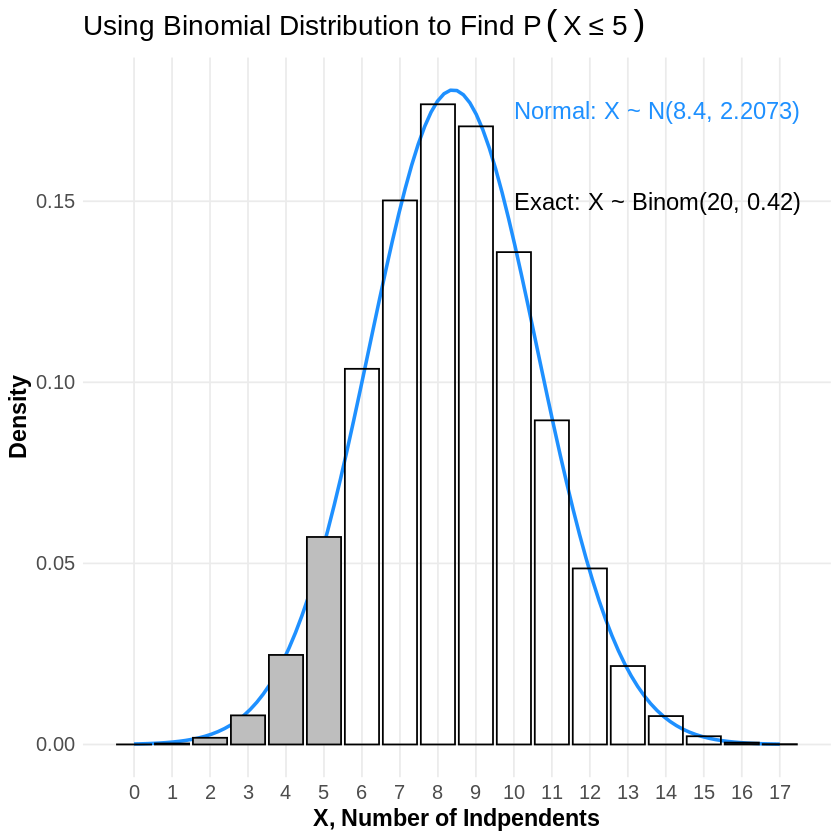

In [26]:
#####################################
# Nothing to Edit in this code cell
# Just run the code cell
# And interpret the output
####################################
n <- 20  # sample size
p <- 0.42  # prob of success
mean <- n*p  # E(X), center of normal
sd <-   sqrt(n*p*(1-p))  # Var of normal = Var(n*p.hat) = n^2 Var(p.hat)

xmin <- round(max(mean - 4*sd,0))  # start plot at x-min
xmax <- round(min(mean + 4*sd,n))  # end plot at x-max
x <- seq(xmin, xmax)  # a vector of all integers between xmin to xmax (inclusive)
y <- dbinom(x,n,p)  # prob of exactly X success via binom

df <- data.frame(x, y)  # combine vectors x and y into a data frame

breaks <- c(xmin, 6, xmax)    # x values 6 and above shaded differently
Success <- c("gray", NA)[findInterval(x, vec=breaks)]  # shade first group group others unfilled

ggplot(df, aes(x = x, y = y)) +  # plot df columns along x,y-axes
# first plot normal dist
  stat_function(fun = dnorm,  # plot gaussian
                args = c(mean = mean, sd = sd),
                col = "dodgerblue",
                linewidth = 1) +
# next superimpose binomial on top of normal
    geom_bar(stat="identity",  # plot P(X=x) as discrete bars
           fill = Success,  # fill according to Success breaks above
           color = "black") +
# add labels to plot
  labs(title = TeX(r"(Using Binomial Distribution to Find $P(X \leq 5)$)"),
       x = "X, Number of Indpendents",
       y = "Density") +
# add text annotations
  annotate("text", x=10, y=0.175,
           size=5, col="dodgerblue", hjust = 0,
           label= "Normal: X ~ N(8.4, 2.2073)") +
  annotate("text", x=10, y=0.15,
           size=5, col="black", hjust = 0,
           label= "Exact: X ~ Binom(20, 0.42)") +
# set plotting options
  scale_x_continuous(breaks=seq(xmin, xmax, 1)) +
  theme_minimal() +
  theme(axis.title.x = element_text(size=14),
        title = element_text(size=14, face='bold'),
        axis.text.x  = element_text(size=12),
        axis.text.y  = element_text(size=12),
        panel.grid.minor = element_blank())

-   In [Question 5](#11q5), we used the CLT for proportions to approximate $P(\widehat{P} \leq 0.25) \approx P( X \leq 5) \approx 0.0617$.
  -   The region corresponding to the approximation $\color{tomato}{P( X \leq 5) \approx 0.0617}$ is shaded in red.
  - This is the area to right of $X=5$ below graph of the normal approximation for $X$ given by $N (8.4, 2.2073)$.
-   Comparing areas in the figure below, we see the area shaded in red is smaller than the actual area of the rectangles over $X=0,1,2,3,4, \mbox{ and } 5$.
  -   Using a normal distribution to approximate areas below a binomial distribution will result in an <font color="dodgerblue">**underestimate**</font>.

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


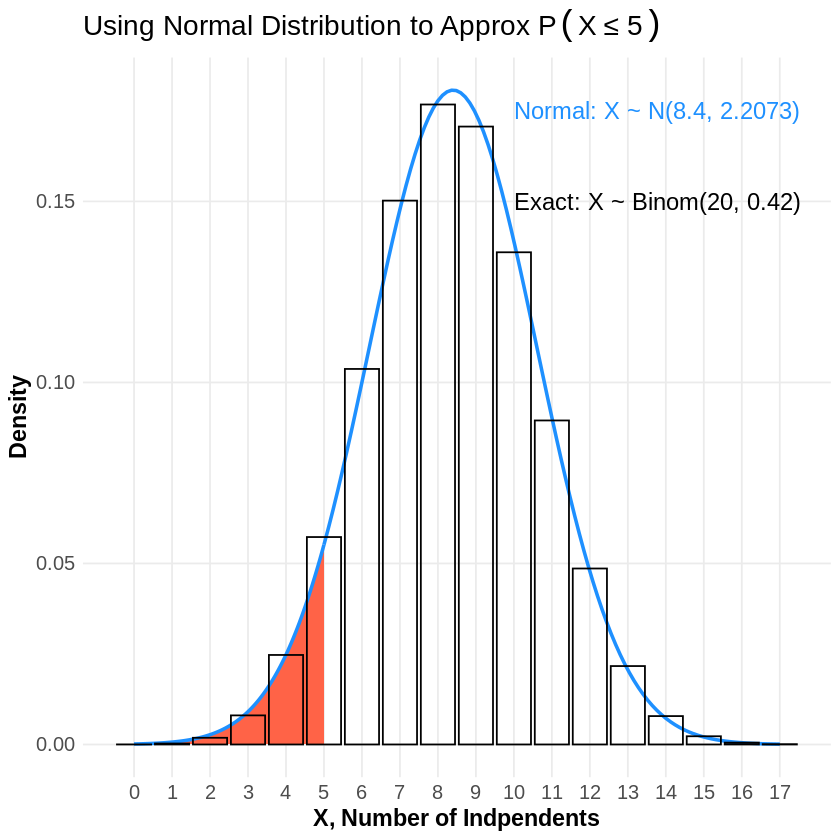

In [27]:
#####################################
# Nothing to Edit in this code cell
# Just run the code cell
# And interpret the output
####################################

ggplot(df, aes(x = x, y = y)) +  #  plot df columns along x,y-axes
# first plot normal dist with parts shaded
  geom_area(stat = "function", fun = dnorm, args = c(mean = mean, sd = sd),
            color = "dodgerblue", fill = "tomato", size = 1,
            xlim = c(xmin, 5)) +
  geom_area(stat = "function", fun = dnorm, args = c(mean = mean, sd = sd),
            color = "dodgerblue", fill = NA, size = 1,
            xlim = c(5, xmax)) +
# then superimpose binomial
  geom_bar(stat="identity",  # plot P(X=x) as discrete bars
           fill = NA,
           color = "black") +
# add labels to plot
  labs(title = TeX(r"(Using Normal Distribution to Approx $P(X \leq 5)$)"),
       x = "X, Number of Indpendents",
       y = "Density") +
# add text annotations
  annotate("text", x=10, y=0.175,
           size=5, col="dodgerblue", hjust = 0,
           label= "Normal: X ~ N(8.4, 2.2073)") +
  annotate("text", x=10, y=0.15,
           size=5, col="black", hjust = 0,
           label= "Exact: X ~ Binom(20, 0.42)") +
# set plotting options
  scale_x_continuous(breaks=seq(xmin, xmax, 1)) +
  theme_minimal() +
  theme(axis.title.x = element_text(face="bold", size=14),
        title = element_text(size=14, face='bold'),
        axis.text.x  = element_text(size=12),
        axis.text.y  = element_text(size=12),
        panel.grid.minor = element_blank())

# <a name="11correct">Continuity Correction for Discrete Random Variables</a>

---

In the previous plot, we note using a normal distribution to approximate a binomial distribution results in an underestimate since we miss capturing some of the rectangular area below the binomial distribution.  We can improve the estimates we obtain using a normal distribution by including some additional area using a <font color="dodgerblue">**continuity correction**</font> as follows.

To more accurately calculate $P( a \leq X \leq b)$ where $a < b$ are integers, then we apply the following correction:

-   Shift the lower cutoff $X=a$ half a unit further to the left, to $X = a-0.5$.
-   Shift the upper cutoff $X=b$ half a unit further to the right, to $X = b+0.5$.

If we use the CLT for proportions to approximate the distribution of sample proportions as
$\widehat{P} \sim N \left( p, \sqrt{\frac{p(1-p)}{n}} \right)$, then using proportions, the two corrected cutoffs will be:

-   <font color="dodgerblue">**Corrected lower sample proportion is $\widehat{p}^*_{\rm lower} = \dfrac{a-0.5}{n}$.**</font>
-   <font color="dodgerblue">**Corrected upper sample proportion is $\widehat{p}^*_{\rm upper} = \dfrac{b+0.5}{n}$.**</font>

Applying a continuity correction to sample proportions, we have an improved estimate:

$$\color{dodgerblue}{\boxed{ P( a \leq X \leq b) \approx  P \left( \frac{a-0.5}{n} < \widehat{P} < \frac{b+0.5}{n} \right)}}.$$



## <a name="11plot-exact">Plot of Exact Area Under Binomial Distribution</a>

---

We can use the binomial distribution $X \sim \mbox{Binom}(n, p)$ to
compute the exact value of $P(a \leq X \leq b)$. We add up the areas of
each of the shaded rectangles.

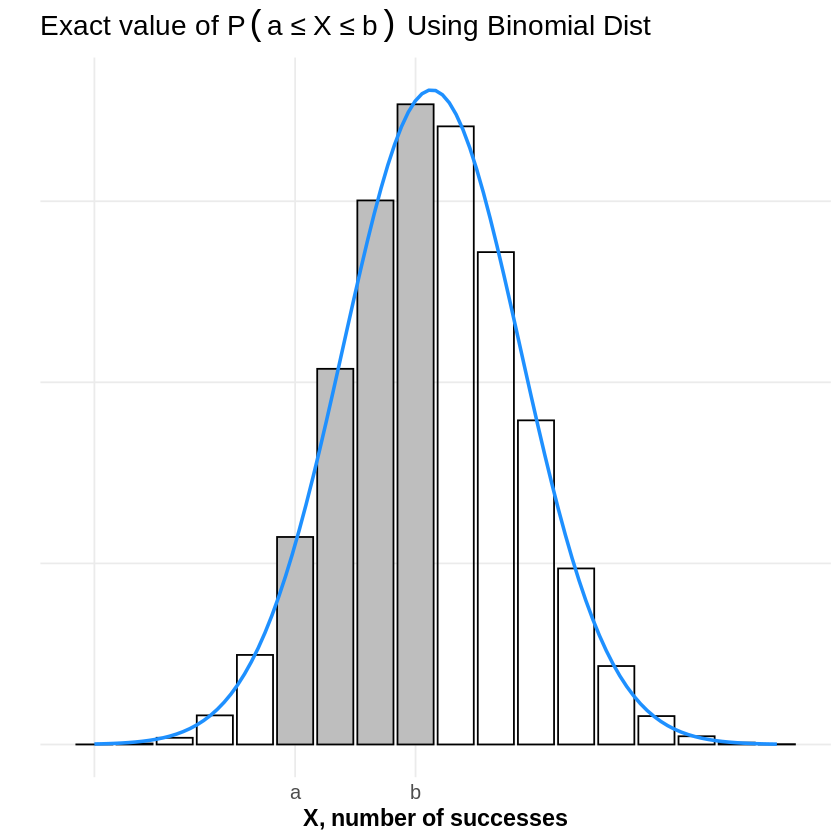

In [28]:
#####################################
# Nothing to Edit in this code cell
# Just run the code cell
# And interpret the output
####################################

breaks <- c(xmin, 5, 9, xmax)  # three different shading regions
Success2 <- c(NA, "gray", NA)[findInterval(x, vec=breaks)]  # shade first group group others unfilled

ggplot(df, aes(x = x, y = y)) +  # plot df columns along x,y-axes
  geom_bar(stat="identity",  # plot P(X=x) as discrete bars
           fill = Success2,
           color = "black") +
# first plot normal dist
  stat_function(fun = dnorm,  # plot gaussian
                args = c(mean = mean, sd = sd),
                col = "dodgerblue",
                size=1) +
  labs(title = TeX(r"(Exact value of $P(a \leq X \leq b)$ Using Binomial Dist)"),  # main label
       x = "X, number of successes",  # x-axis label
       y = "") +  # y-axis label
  # set plotting options
  scale_x_continuous(breaks=c(0,5,8), labels=c("", "a", "b")) +
  theme_minimal() +
  theme(axis.title.x = element_text(face="bold", size=14),
        title = element_text(size=14, face='bold'),
        axis.text.x = element_text(size=12),
        #axis.text.y = element_text(size=12),
        axis.text.y = element_blank(),
        panel.grid.minor = element_blank())

## <a name="11plot-none">Plot of Normal Approximation Without a Continuity Correction</a>

---

If we use the CLT for proportions we get
$\widehat{P} \sim N \left( p, \sqrt{\frac{p(1-p)}{n}} \right)$. Using
the CLT for proportions without applying a continuity correction, we get
an <font color="tomato">**underestimate
$P \left( \frac{a}{n} \leq \widehat{P} \leq \frac{b}{n} \right) \approx$
that is shaded in red below**</font>. Notice there is gray shaded area
under the binomial distribution that is missing from the shaded region
under the normal distribution.

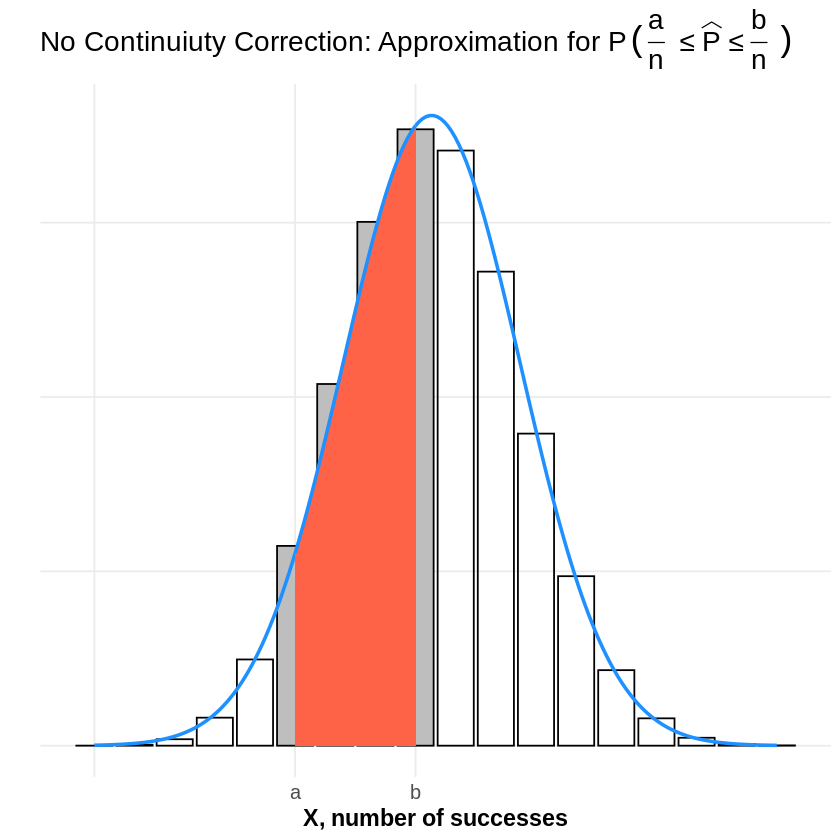

In [29]:
#####################################
# Nothing to Edit in this code cell
# Just run the code cell
# And interpret the output
####################################

ggplot(df, aes(x = x, y = y)) +  # plot df columns along x,y-axes
  geom_bar(stat="identity",  # plot P(X=x) as discrete bars
           fill = Success2,
           color = "black") +
  geom_area(stat = "function", fun = dnorm, args = c(mean = mean, sd = sd),
            color = "dodgerblue", fill = NA, size = 1,
            xlim = c(xmin, 5)) +
  geom_area(stat = "function", fun = dnorm, args = c(mean = mean, sd = sd),
            color = "dodgerblue", fill = "tomato", size = 1,
            xlim = c(5, 8)) +
  geom_area(stat = "function", fun = dnorm, args = c(mean = mean, sd = sd),
            color = "dodgerblue", fill = NA, size = 1,
            xlim = c(8, xmax)) +
  labs(title = TeX(r"(No Continuiuty Correction: Approximation for $P ( \frac{a}{n} \leq \widehat{P} \leq \frac{b}{n} )$)"),
       x = "X, number of successes",  # x-axis label
       y = "") +  # y-axis label
  # set plotting options
  scale_x_continuous(breaks=c(0,5,8), labels=c("", "a", "b")) +
  theme_minimal() +
  theme(axis.title.x = element_text(face="bold", size=14),
        title = element_text(size=14, face='bold'),
        axis.text.x = element_text(size=12),
        #axis.text.y = element_text(size=12),
        axis.text.y = element_blank(),
        panel.grid.minor = element_blank())

## <a name="11yes-correct">Plot of Normal Approximation With a Continuity Correction</a>

---

Using the CLT for proportions along with a continuity correction, we get
an <font color="dodgerblue">**improved estimate
$P \left( \frac{a-0.5}{n} \leq \widehat{P} \leq \frac{b+0.5}{n} \right)$**</font> which is the <font color="tomato">red region</font> plus the <font color="dodgerblue">additional area in the two blue strips</font>. The sum of the red and blue areas under the normal distribution is a much better approximation for the exact area under the binomial distribution.

-   There is a little extra area beneath the normal curve that is not included in any of the rectangular bars under the binomial distribution.
-   The extra area under the normal distribution approximately balances out the remaining gray rectangular areas missed above the normal distribution.

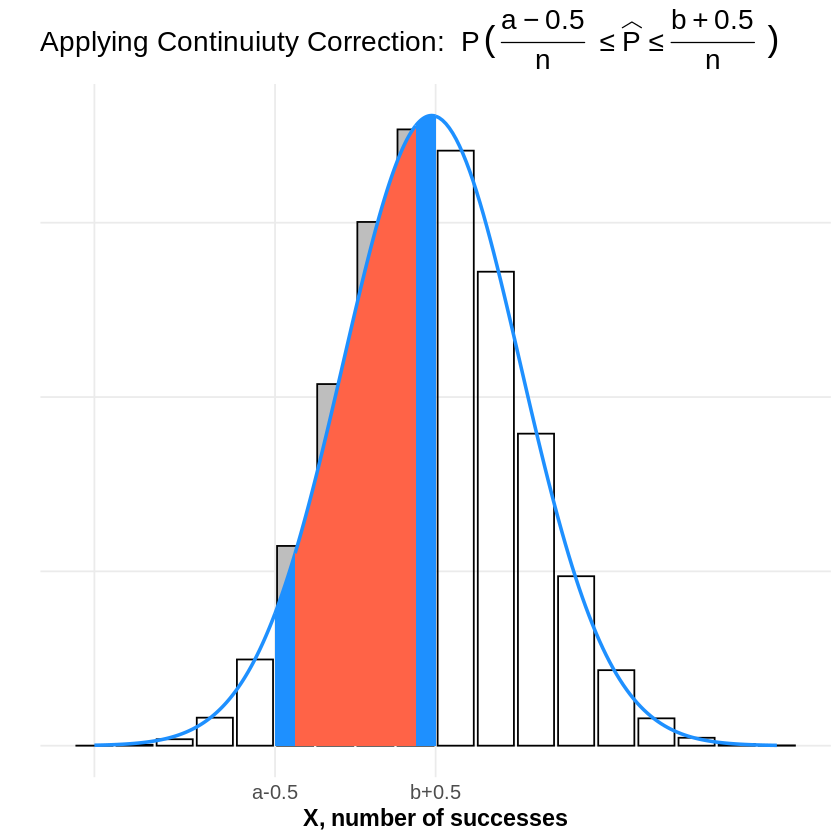

In [30]:
#####################################
# Nothing to Edit in this code cell
# Just run the code cell
# And interpret the output
####################################

ggplot(df, aes(x = x, y = y)) +  # plot df columns along x,y-axes
  geom_bar(stat="identity",  # plot P(X=x) as discrete bars
           fill = Success2,
           color = "black") +
  geom_area(stat = "function", fun = dnorm, args = c(mean = mean, sd = sd),
            color = "dodgerblue", fill = NA, size = 1,
            xlim = c(xmin, 4.5)) +
  geom_area(stat = "function", fun = dnorm, args = c(mean = mean, sd = sd),
            color = "dodgerblue", fill = "dodgerblue", size = 1,
            xlim = c(4.5, 5)) +
  geom_area(stat = "function", fun = dnorm, args = c(mean = mean, sd = sd),
            color = "dodgerblue", fill = "tomato", size = 1,
            xlim = c(5, 8)) +
  geom_area(stat = "function", fun = dnorm, args = c(mean = mean, sd = sd),
            color = "dodgerblue", fill = "dodgerblue", size = 1,
            xlim = c(8, 8.5)) +
  geom_area(stat = "function", fun = dnorm, args = c(mean = mean, sd = sd),
            color = "dodgerblue", fill = NA, , size = 1,
            xlim = c(8.5, xmax)) +
    labs(title = TeX(r"(Applying Continuiuty Correction:  $P ( \frac{a-0.5}{n} \leq \widehat{P} \leq \frac{b+0.5}{n} )$)"),
       x = "X, number of successes",  # x-axis label
       y = "") +  # y-axis label
  # set plotting options
  scale_x_continuous(breaks=c(0,4.5,8.5), labels=c("", "a-0.5", "b+0.5")) +
  theme_minimal() +
  theme(axis.title.x = element_text(face="bold", size=14),
        title = element_text(size=14, face='bold'),
        axis.text.x = element_text(size=12),
        #axis.text.y = element_text(size=12),
        axis.text.y = element_blank(),
        panel.grid.minor = element_blank())

## <a name="11q8">Question 8</a>

---

Use the CLT for proportions along with a continuity correction to approximate the probability of randomly selecting a jury pool of $n=20$ people that has at most 5 people that identify politically as Independent. Assume that 42% of all eligible jurors identify their political party as Independent.

-   *Note: Although our sample size does not technically satisfy the conditions for the CLT for proportions, we verified the results hold in this example, so we may go ahead and use the CLT.*
-   *Hint: There is no correction needed for a the lower cutoff since there is no lower cutoff. You only need to apply the correction to get a new upper cutoff.*

### <a name="11sol8">Solution to Question 8</a>

---

If the $\widehat{p}_{\rm{upper}} = 0.25$, then we have $b = \widehat{p} \cdot n = (0.25)(20) = 5$. The upper cutoff after applying a continuity correction is therefore

$$\widehat{p}^*_{\rm{upper}}= \frac{5+0.5}{20} = 0.275$$

Thus, we have:

$$P( X \leq 5) \approx  P( \widehat{P} \leq 0.275) = 0.0944.$$


- <font color="dodgerblue">Exact value using Binomial distribution: $P(X \leq 5) = 0.0922$.</font>

- <font color="mediumseagreen">Approximate value using simulation $P( X \leq 5) \approx P( \widehat{P} \leq 0.25) = 0.0915$.</font>


- <font color="tomato">Approximate value using CLT without a continuity correction: $P( X \leq 5) \approx P( \widehat{P} \leq 0.25) = 0.0617$.</font>

- <font color="mediumseagreen">Approximate value using CLT with a continuity correction: $P( X \leq 5) \approx P( \widehat{P} \leq 0.275) = 0.0944$.</font>


<br>



In [31]:
p.star <- 5.5/20

pnorm(p.star, 0.42, se.ind)

[1] 0.09444907

## <a name="11q9">Question 9</a>

---

Census Bureau data for 2017 shows nearly half (48 percent) of residents in the United States' five largest cities now speak a language other than English at home<sup>1</sup>. If a sample of 150 people is selected at random from the five largest cities in the US, what is the probability that between 44% and 48% of people in the sample speak a language other than English at home?

<br>

<font size="2"> 1. Karen Zeigler and Steven A. Camarota [*Almost Half Speak a Foreign Language in America's Largest Cities*](https://cis.org/Report/Almost-Half-Speak-Foreign-Language-Americas-Largest-Cities#1). Center for Immigration Studies, 2018 Sep 29. </font>


### <a name="11q9a">Question 9a</a>

---

Is $n$ large enough to use the CLT? Explain why or why not?

#### <a name="11sol9a">Solution to Question 9a</a>

---

Yes, we can apply CLT for the proportion since BOTH

$$np = (150)(0.48) \geq 10 \qquad \mbox{and} \qquad n(1-p) = (150)(0.52) \geq 10.$$


<br>



### <a name="11q9b">Question 9b</a>

---

Using the CLT for a proportion, find the $z$-scores of the proportions
$0.44$ and $0.48$.

#### <a name="11sol9b">Solution to Question 9b</a>

---

By CLT, we have $\widehat{P} \sim N \left( 0.48, \sqrt{\frac{(0.48)(0.52)}{150}} \right) = 0.0408$. Since the upper sample proportion $0.48$ is equal to the mean of the sampling distribution, the $z$-score for $0.48$ is $z_{\rm{upper}} = 0$.

The lower sample proportion has $z$-score:

$$z_{\rm{lower}} = \frac{0.44 - 0.48}{0.0408} = -0.9806.$$

<br>  
<br>  
<br>



In [32]:
se.lang <- sqrt(0.48 * 0.52 / 150)
se.lang
z.low <- (0.44 - 0.48) / se.lang
z.up <- 0
z.low

[1] 0.04079216

[1] -0.9805807

### <a name="11q9c">Question 9c</a>

---

Using the $z$-scores from [Question 9b](#119b), what is the probability that
between 44% and 48% (out of the random sample of 150 people) speak a
language other than English at home?

#### <a name="11sol9c">Solution to Question 9c</a>

---

$$P( 0.44 \leq \widehat{P} \leq 0.48) \approx 0.3366.$$

<br>



In [33]:
pnorm(0) - pnorm(z.low)

[1] 0.3366002

### <a name="11q9d">Question 9d</a>

---

Using the CLT for a proportion **along with a continuity correction**,
give updated $z$-scores after applying a continuity correction to both
endpoints of the interval.

#### <a name="11sol9d">Solution to Question 9d</a>

---

We have $a = n \cdot \widehat{p}_{\rm{lower}} = (150)(0.44) = 66$ and $b = n \cdot \widehat{p}_{\rm{upper}} = 72$.

Thus, the correct cutoffs are

$$\widehat{p}^*_{\rm{lower}} = 0.4366 \qquad \mbox{and} \qquad \widehat{p}^*_{\rm{upper}} = 0.4833.$$


Finally, we compute the corresponding $z$-score of each using CLT approximation $\widehat{P} \sim N \left( 0.48, 0.408 \right)$. This gives corrected $z$-scores

$$z^*_{\rm{lower}} = -1.0623 \qquad \mbox{and} \qquad z^*_{\rm{upper}} = 0.0817.$$

  
<br>  
<br>



In [34]:
a <- 150 * 0.44
b <- 150 * 0.48
a
b

[1] 66

[1] 72

In [35]:
p.star.low <- (a - 0.5) / 150
p.star.up <- (b + 0.5) / 150

p.star.low
p.star.up

[1] 0.4366667

[1] 0.4833333

In [36]:
z.star.low <- (p.star.low - 0.48) / se.lang
z.star.up <- (p.star.up - 0.48) / se.lang

z.star.low
z.star.up

[1] -1.062296

[1] 0.08171506

### <a name="11q9e">Question 9e</a>

---

Using the $z$-scores obtained from the continuity correction in
[Question 9d](#11q9d), what is the probability that between 44% and 48% (out of the random sample of 150 people) speak a language other than English at home?

#### <a name="11sol9e">Solution to Question 9e</a>

---


$$P( 0.44 \leq \widehat{P} \leq 0.48) \approx 0.3885.$$

<br>  
<br>  
<br>



In [37]:
pnorm(z.star.up) - pnorm(z.star.low)

[1] 0.3885126

## <a name="11q10">Question 10</a>

---

In [Question 9](#11q9) we calculated $P\left( 0.44 \leq \widehat{P} \leq 0.48 \right)$ using a normal distribution. We could equivalently rewrite this probability in terms of the discrete random variable $X \sim \mbox{Binom}(150,0.48)$ as $P( 66 \leq X \leq 72$).


### <a name="11q10a">Question 10a</a>

---

Using a binomial distribution, calculate the exact value of $P( 66 \leq X \leq 72)$.



#### <a name="11sol10a">Solution to Question 10a</a>

---

We have

$$P( 66 \leq X \leq 72) = P(X \leq 72) - P(X \leq 65) = 0.3890.$$

<br>


In [38]:
# use binomial functions in R to solve 10a
pbinom(72, 150, 0.48) - pbinom(65, 150, 0.48)

[1] 0.3889743

### <a name="11q10b">Question 10b</a>

---

Compare approximations from [Question 9c](#11q9c) and [Question 9e](#11q9e) with the exact calculation in [Question 10a](#11q10a). Comment on whether or not the continuity correction improved the approximation or not.

#### <a name="11sol10b">Solution to Question 10b</a>

---

<br>  

- In [Question 9c](#11q9c) our approximation without a continuity correction was $P( 0.44 \leq \widehat{P} \leq 0.48) \approx 0.3366$.

- In [Question 9e](#11q9e) our approximation with a continuity correction was $P( 0.44 \leq \widehat{P} \leq 0.48) \approx 0.3885$.

- In [Question 10a](#11q10a) we found the exact value using a Binomial distribution, $P( 0.44 \leq \widehat{P} \leq 0.48) = 0.3890$.

- We get a more accurate approximation from the CLT when we apply a continuity correction.

<br>



# <a name="10CC License">Creative Commons License Information</a>
---


![Creative Commons
License](https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png)

*Statistical Methods: Exploring the Uncertain* by [Adam
Spiegler (University of Colorado Denver)](https://github.com/CU-Denver-MathStats-OER/Statistical-Theory)
is licensed under a [Creative Commons
Attribution-NonCommercial-ShareAlike 4.0 International
License](http://creativecommons.org/licenses/by-nc-sa/4.0/). This work is funded by an [Institutional OER Grant from the Colorado Department of Higher Education (CDHE)](https://cdhe.colorado.gov/educators/administration/institutional-groups/open-educational-resources-in-colorado).

For similar interactive OER materials in other courses funded by this project in the Department of Mathematical and Statistical Sciences at the University of Colorado Denver, visit <https://github.com/CU-Denver-MathStats-OER>.